In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# Crear un grafo vacío
G = nx.Graph()

# Leer el archivo de aristas (edges) y agregar las conexiones al grafo
with open('12831.edges', 'r') as f_edges:
    for line in f_edges:
        source, target = line.strip().split()
        G.add_edge(source, target)

# Leer el archivo de características (feat) y agregar las características a los nodos
with open('12831.feat', 'r') as f_feat:
    for line in f_feat:
        node, *features = map(int, line.strip().split())
        G.add_node(node, features=features)

# Leer el archivo de características ego (egofeat) y agregarlas al nodo ego
with open('12831.egofeat', 'r') as f_egofeat:
    features = list(map(int, f_egofeat.readline().strip().split()))
    if G.has_node('ego'):
        G.nodes['ego']['features'] = features

# Leer el archivo de círculos (circles) y agregar las relaciones entre nodos a los grupos
with open('12831.circles', 'r') as f_circles:
    for line in f_circles:
        circle, *nodes = line.strip().split()
        for node in nodes:
            if G.has_node(node):
                G.nodes[node]['circle'] = circle



In [ ]:
# Ahora tienes un grafo G con nodos, aristas y características asociadas. Puedes realizar análisis de grafos, aprendizaje automático u otras tareas según sea necesario.
degrees = [G.degree[node] for node in G.nodes()]
degrees


[2,
 47,
 14,
 31,
 33,
 44,
 48,
 24,
 26,
 8,
 18,
 33,
 21,
 8,
 6,
 15,
 21,
 37,
 12,
 23,
 59,
 30,
 27,
 21,
 21,
 36,
 14,
 31,
 14,
 31,
 33,
 6,
 52,
 38,
 30,
 28,
 28,
 9,
 12,
 22,
 41,
 16,
 11,
 25,
 16,
 16,
 29,
 46,
 33,
 18,
 14,
 4,
 7,
 17,
 3,
 3,
 9,
 28,
 11,
 26,
 7,
 8,
 17,
 12,
 13,
 7,
 12,
 6,
 46,
 13,
 6,
 40,
 49,
 20,
 12,
 12,
 17,
 22,
 26,
 47,
 28,
 11,
 29,
 8,
 6,
 4,
 17,
 8,
 11,
 20,
 30,
 20,
 44,
 15,
 5,
 9,
 28,
 16,
 41,
 31,
 16,
 38,
 27,
 34,
 24,
 39,
 5,
 19,
 5,
 18,
 6,
 28,
 37,
 13,
 27,
 31,
 3,
 2,
 23,
 21,
 29,
 5,
 4,
 32,
 21,
 21,
 32,
 16,
 9,
 15,
 35,
 8,
 15,
 11,
 12,
 17,
 46,
 11,
 4,
 14,
 21,
 14,
 12,
 10,
 24,
 4,
 11,
 6,
 19,
 8,
 23,
 19,
 7,
 8,
 18,
 5,
 11,
 13,
 10,
 5,
 11,
 8,
 5,
 7,
 8,
 16,
 11,
 4,
 13,
 10,
 14,
 5,
 7,
 20,
 6,
 8,
 4,
 1,
 5,
 3,
 18,
 3,
 14,
 1,
 5,
 8,
 6,
 5,
 10,
 7,
 1,
 19,
 7,
 4,
 6,
 14,
 3,
 6,
 11,
 2,
 8,
 11,
 11,
 5,
 2,
 4,
 3,
 4,
 3,
 10,
 1,
 2,
 2,
 4,
 3,
 4,

Text(0.5, 0, 'Clustering coefficient.')

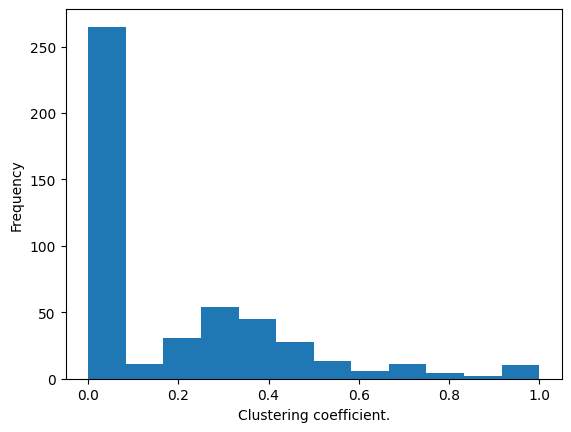

In [ ]:
cc = nx.clustering(G)
plt.hist(list(cc.values()),bins='auto')
plt.ylabel("Frequency")
plt.title("")
plt.xlabel("Clustering coefficient.")


In [ ]:
bc = nx.betweenness_centrality(G)
dict(sorted(bc.items(), key= lambda kv: kv[1], reverse=True))



{'180505807': 0.023575351061264377,
 '1678471': 0.010710404651124598,
 '1186': 0.010372564886648792,
 '1260231': 0.009935694448501634,
 '883301': 0.008803309155753435,
 '22253': 0.008697684788254794,
 '174958347': 0.008450035196004109,
 '5854882': 0.007353572168304888,
 '57378470': 0.006590852390997637,
 '67157376': 0.006414254245959922,
 '586': 0.005870316525073343,
 '14231571': 0.00582279157399657,
 '652193': 0.005783742864779052,
 '8630562': 0.005575086036012746,
 '713263': 0.005234318946546302,
 '1566521': 0.0051952521779489265,
 '380': 0.005179717123665008,
 '15384741': 0.005059506977767038,
 '528': 0.004963284010691345,
 '15583257': 0.0048909466979560785,
 '20904050': 0.004873510252586998,
 '2735631': 0.004523633053652671,
 '9283582': 0.004376430186398564,
 '20554406': 0.004238126527848656,
 '761': 0.004205068417488628,
 '8479062': 0.0040975737705900616,
 '19507576': 0.0040443392353316275,
 '14749606': 0.003990313998926902,
 '668423': 0.003945456882117483,
 '11178592': 0.00371354

In [ ]:
ac = nx.degree_assortativity_coefficient(G)
ac

0.12124663824327542

In [ ]:
# Get the number of connected components in the network
num_connected_components = nx.number_connected_components(G)

print("Number of connected components:", num_connected_components)

Number of connected components: 246


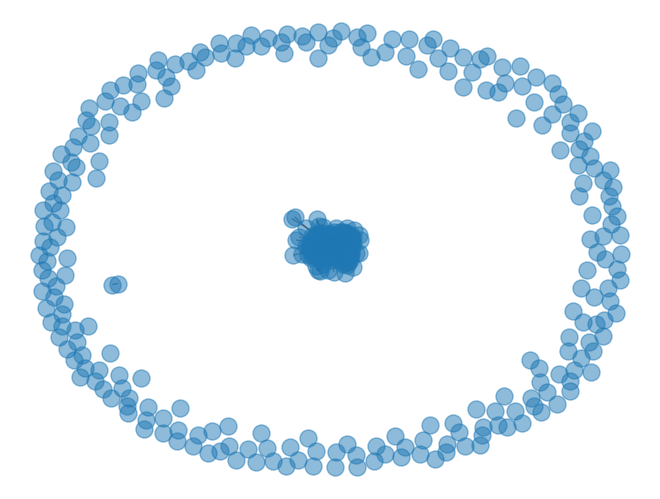

In [ ]:

#Visualizing the social network / topology diagram
layout = nx.spring_layout(G)
nx.draw(G,pos=layout,node_size=150,alpha=0.5)
plt.title("")
plt.show()

In [ ]:


# Encuentra los componentes conectados
connected_components = list(nx.connected_components(G))

# Encuentra el componente principal (el más grande)
main_component = max(connected_components, key=len)

# Crear un nuevo grafo solo con el componente principal
main_graph = G.subgraph(main_component).copy()

# Ahora main_graph contiene solo el componente principal de tu red.

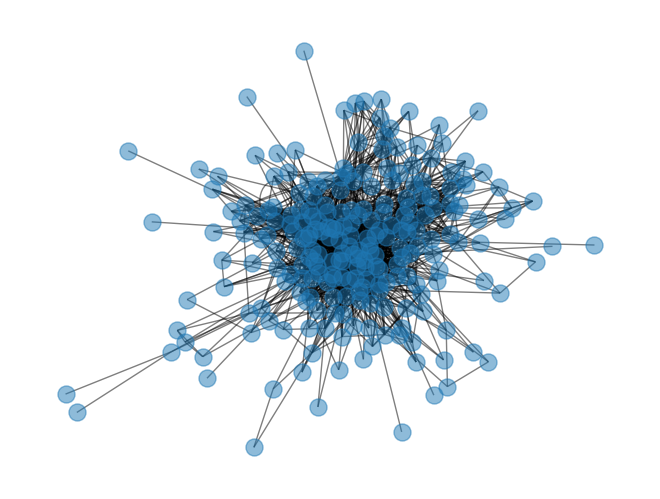

In [ ]:

#Visualizing the social network / topology diagram
layout = nx.spring_layout(main_graph)
nx.draw(main_graph,pos=layout,node_size=150,alpha=0.5)
plt.title("")
plt.show()

In [ ]:
#Measure the density of the network
density = nx.density(main_graph)
print("Density:", density)

Density: 0.06639521660980889


In [ ]:
#Measure the average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(main_graph)
print("Average shortest path length:", avg_shortest_path_length)

Average shortest path length: 2.5406991673086092


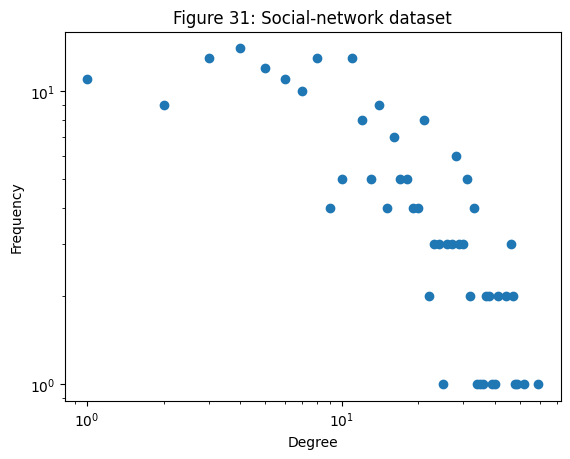

In [ ]:
degree_dist = nx.degree_histogram(main_graph)[1:] # Skip 0 degree nodes which means the ones with no connections
# Plot the Degree Distribution on a log scale
plt.loglog(range(1,len(degree_dist)+1),degree_dist,'o')
plt.title('Figure 31: Social-network dataset')
plt.ylabel('Frequency')
plt.xlabel('Degree');

In [ ]:
bc = nx.betweenness_centrality(main_graph)
dict(sorted(bc.items(), key= lambda kv: kv[1], reverse=True))

{'180505807': 0.09985680645421807,
 '1678471': 0.04536546673321724,
 '1186': 0.04393449758725913,
 '1260231': 0.04208406971137032,
 '883301': 0.037287688155239355,
 '22253': 0.03684030088220353,
 '174958347': 0.03579134524469982,
 '5854882': 0.031147117633554513,
 '57378470': 0.027916507790950135,
 '67157376': 0.02716850082624455,
 '586': 0.02486457400129203,
 '14231571': 0.024663275202852664,
 '652193': 0.024497878751767444,
 '8630562': 0.0236140825991111,
 '713263': 0.02217071434510754,
 '1566521': 0.022005241400909096,
 '380': 0.02193944043341327,
 '15384741': 0.02143027298807711,
 '528': 0.02102270670519297,
 '15583257': 0.020716311563146003,
 '20904050': 0.020642456978926013,
 '2735631': 0.019160501539707393,
 '9283582': 0.018537002522165696,
 '20554406': 0.017951197389175735,
 '761': 0.017811174985293606,
 '8479062': 0.01735586587357262,
 '19507576': 0.017130383306200977,
 '14749606': 0.016901551609854612,
 '668423': 0.016711552809001468,
 '11178592': 0.01572927508127715,
 '63832

In [ ]:
cc = nx.clustering(main_graph)
cc

{'19208772': 0.45454545454545453,
 '14087951': 0.32857142857142857,
 '20221130': 0.6666666666666666,
 '7415132': 0.45751633986928103,
 '16803822': 0.27485380116959063,
 '6368672': 0,
 '9863222': 0.32051282051282054,
 '17384098': 0.5,
 '19101100': 1.0,
 '12081222': 0.3333333333333333,
 '136865608': 0.2,
 '9411772': 0.6666666666666666,
 '5264791': 0.3333333333333333,
 '40198602': 0.34285714285714286,
 '16353769': 0.5357142857142857,
 '17729005': 0.3897058823529412,
 '20904050': 0.2735632183908046,
 '57378470': 0.23573573573573572,
 '248049056': 0.09523809523809523,
 '1371101': 0.43636363636363634,
 '606083': 0.3333333333333333,
 '104937383': 0.2777777777777778,
 '15162141': 0.4,
 '165964253': 0.3333333333333333,
 '14819149': 0.26842105263157895,
 '883301': 0.2329268292682927,
 '68824195': 0.4065934065934066,
 '14': 0.6190476190476191,
 '13652832': 0.45714285714285713,
 '10013512': 0.4264705882352941,
 '27985216': 0.2909090909090909,
 '1765921': 0.34065934065934067,
 '14710479': 0.3118279

In [ ]:
ac = nx.degree_assortativity_coefficient(main_graph)
ac

0.11967578238344916

In [ ]:
ListaAristas = [(int(x), int(y)) for x, y in main_graph.edges]
Grafo = ListaAristas
seed_node_ex = 1656891

#Métodos de propagación de información

#0. Modelo Cascada

El modelo de cascada es una herramienta poderosa para estudiar la propagación de la influencia en redes, ya que proporciona una forma simplificada pero efectiva de entender cómo se comportan y evolucionan los sistemas complejos.

  0. **Inicio del proceso**: El proceso comienza con la selección de un conjunto inicial de nodos activos, llamados "semillas" o "nodos iniciales". Estos nodos representan el punto de partida de la cascada.
  1. **Propagación de la activación**: En cada paso del proceso, los nodos activos intentan activar a sus vecinos en la red con cierta probabilidad. Esta probabilidad puede ser fija o variable y representa la predisposición de un nodo para influir en sus vecinos.
  Cuando un nodo activo intenta activar a un vecino, este último se activa con éxito si cumple ciertas condiciones, *como superar un umbral de influencia determinado por la probabilidad de activación*.
  Los nodos recién activados se añaden al conjunto de nodos activos, y el proceso continúa iterativamente hasta que ya no hay nodos nuevos que se puedan activar.
  2. **Finalización del proceso**: El proceso de propagación se detiene cuando ya no hay nodos nuevos que se puedan activar, es decir, cuando la cascada ha alcanzado su máximo alcance dentro de la red.

Dependiendo de la configuración del modelo y de las características de la red, la cascada puede propagarse rápidamente por toda la red, alcanzar solo una parte de la red o incluso extinguirse antes de alcanzar una porción significativa de nodos.

Se utiliza para predecir el alcance y la velocidad de propagación de ciertos fenómenos en redes complejas, lo que permite diseñar estrategias efectivas para maximizar la propagación de información o minimizar la propagación de enfermedades, por ejemplo.



In [ ]:
import networkx as nx
import random

def cascade_model(graph, seed_node, activation_prob):
    active_nodes = set([seed_node])
    activated = set([seed_node])
    while active_nodes:
        new_active_nodes = set()
        for node in active_nodes:
            neighbors = list(graph.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated:
                    if random.random() < activation_prob:
                        activated.add(neighbor)
                        new_active_nodes.add(neighbor)
        active_nodes = new_active_nodes
    return activated

# Modelo de Cascada
G = nx.Graph(ListaAristas)
seed_node = seed_node_ex  # Nodo semilla
activation_prob = 0.1  # Probabilidad de activación de nodo
activated_nodes = cascade_model(G, seed_node, activation_prob)
print("Nodos activados:", activated_nodes)


Nodos activados: {14267393, 11322372, 8067082, 75939851, 30331404, 14, 2735631, 528, 14231571, 3191321, 15583257, 8630302, 326658079, 1765921, 8132642, 17864230, 47, 9767472, 713263, 9863222, 1656891, 51518017, 18248772, 19208772, 6331462, 12081222, 586, 6735, 17129553, 15166546, 19966557, 5634142, 11178592, 19094625, 883301, 20904050, 9943672, 68824195, 1678471, 2727051, 15459980, 14892191, 1186, 5854882, 15384741, 57378470, 20554406, 16004268, 9411772, 6088382, 305888449, 62415556, 1260231, 17633994, 14710479, 180505807, 12800212, 15304923, 5827292, 179339999, 20755177, 13334762, 22253, 377821426, 761, 14305022, 551433993, 174958347, 16461070, 14087951, 12007182, 19223, 12725022, 8630562, 15639334, 17798441, 13538092, 1566521, 18498878, 27985216, 2372, 10013512, 22084427, 14450509, 14819149, 19042640, 8479062, 14202711, 16215038, 14086492, 7415132, 14471007, 13652832, 16007011, 6160742, 638323, 19507576, 380, 15775613, 67157376, 16912257, 19479427, 1859981, 563200400, 14172562, 18414

Al final del proceso de cascada, se puede analizar el conjunto de nodos activados para comprender mejor cómo se propagó la influencia en la red.

In [ ]:
import networkx as nx
import random

def cascade_model(graph, seed_node, activation_prob):
    active_nodes = set([seed_node])
    activated = set([seed_node])
    while active_nodes:
        new_active_nodes = set()
        for node in active_nodes:
            neighbors = list(graph.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in activated:
                    if random.random() < activation_prob:
                        activated.add(neighbor)
                        new_active_nodes.add(neighbor)
        active_nodes = new_active_nodes
    print("Nodos activados:",activated)
    return activated

def calculate_cascade_metrics(graph, seed_node, activation_prob):
    activated_nodes = cascade_model(graph, seed_node, activation_prob)
    cascade_size = len(activated_nodes)
    density_of_activation = cascade_size / graph.number_of_nodes()
    return cascade_size, density_of_activation

# Input graph
G = nx.Graph(Grafo)
seed_node = seed_node_ex
activation_prob = 0.3
cascade_size, density_of_activation = calculate_cascade_metrics(G, seed_node, activation_prob)

print("Size of the cascade:", cascade_size)
print("Density of activation:", density_of_activation)

Nodos activados: {1656891}
Size of the cascade: 1
Density of activation: 0.004273504273504274


#Modelo de difusión de virus

El modelo de **difusión de virus** está diseñado específicamente para modelar la propagación de un virus o enfermedad en una red. Busca identificar los nodos que pueden ser infectados en función de la probabilidad de transmisión y los nodos ya infectados en la red.

La propagación del virus se produce de manera probabilística, donde cada nodo infectado tiene una probabilidad de transmitir la enfermedad a sus vecinos no infectados.

El modelo de **difusión de virus** no tiene un bucle iterativo explícito. La propagación del virus se produce en una sola iteración.

In [ ]:
import networkx as nx
import random

def virus_spread(graph, infected_nodes, transmission_prob):
    new_infected_nodes = set()
    for node in infected_nodes:
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
            if neighbor not in infected_nodes:
                if random.random() < transmission_prob:
                    new_infected_nodes.add(neighbor)
    return new_infected_nodes

G = nx.Graph(Grafo)
infected_nodes = {seed_node_ex}
transmission_prob = 0.4
new_infected = virus_spread(G, infected_nodes, transmission_prob)
print("New infected nodes:", new_infected)


New infected nodes: {5994452}


#Analisis

Analizar qué nodos han sido expuestos al contenido y cuántos nuevos nodos han visto el contenido como resultado de la propagación.

Para analizar qué nodos han sido expuestos al contenido y cuántos nuevos nodos han visto el contenido como resultado de la propagación en la simulación de la difusión de información en redes sociales:

0. Seguimiento de los nodos expuestos: Después de ejecutar la simulación, se lleva un registro de todos los nodos que han sido expuestos al contenido.

1. Seguimiento de los nuevos nodos expuestos: Además,se lleva un registro de los nuevos nodos que han sido expuestos al contenido en cada paso de la simulación. Estos son los nodos que se vuelven activos debido a la difusión del contenido por parte de otros nodos.


In [ ]:
import networkx as nx
import random

def virus_spread(graph, infected_nodes, transmission_prob):
    new_infected_nodes = set()
    for node in infected_nodes:
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
            if neighbor not in infected_nodes:
                if random.random() < transmission_prob:
                    new_infected_nodes.add(neighbor)
    return new_infected_nodes

# Input graph
G = nx.Graph(Grafo)
seed_node = seed_node_ex
transmission_prob = 0.3

# Simulation
infected_nodes = {seed_node}
new_infected_nodes = set()
exposed_nodes = set()

# Simulate multiple diffusion steps
for _ in range(5):
    new_infected_nodes = virus_spread(G, infected_nodes, transmission_prob)
    exposed_nodes |= new_infected_nodes  # Update exposed nodes
    infected_nodes |= new_infected_nodes  # Update infected nodes

# Resultados
print("Exposed Nodes:", exposed_nodes)
print("Number of exposed nodes:", len(exposed_nodes))



Exposed Nodes: {11322372, 174958347, 30331404, 12007182, 2735631, 528, 14231571, 15583257, 3191321, 15162141, 12725022, 1765921, 8630562, 17864230, 15187243, 47, 713263, 9863222, 1566521, 18498878, 51518017, 19208772, 6331462, 10013512, 586, 6735, 17129553, 16934483, 8479062, 14202711, 7415132, 5634142, 14471007, 13652832, 460693601, 11178592, 16007011, 728163, 883301, 6160742, 380, 15775613, 16912257, 68824195, 19479427, 1678471, 8708232, 15459980, 563200400, 163449492, 18414485, 662423, 6731422, 248049056, 652193, 1186, 5854882, 6687652, 255617445, 57378470, 20554406, 10476462, 51123, 14367669, 29294520, 305888449, 13141442, 62415556, 12741, 1260231, 17633994, 14710479, 180505807, 5994452, 1371101, 179339999, 83971810, 13334762, 22253, 16803822, 14142965, 761, 636923, 14305022}
Number of exposed nodes: 84


#Distancias

In [ ]:
import networkx as nx

def distances_from_node(graph, source_node):
    distances = {}  # Diccionario para almacenar las distancias desde el nodo fuente a los demás nodos
    visited = set()  # Conjunto para almacenar los nodos visitados durante BFS
    queue = [(source_node, 0)]  # Cola para realizar la búsqueda en anchura, iniciada con el nodo fuente y su distancia 0

    while queue:
        node, distance = queue.pop(0)  # Obtener el siguiente nodo y su distancia desde la cola
        distances[node] = distance  # Almacenar la distancia al nodo en el diccionario de distancias
        visited.add(node)  # Marcar el nodo como visitado

        # Obtener los vecinos no visitados del nodo actual y agregarlos a la cola con la distancia incrementada en 1
        neighbors = set(graph.neighbors(node)) - visited
        for neighbor in neighbors:
            queue.append((neighbor, distance + 1))

    return distances

# Grafo input
G = nx.Graph()
G.add_edges_from(Grafo)

# Nodo fuente para calcular las distancias desde él
#source_node = seed_node_ex
source_node = 180505807

# Calcular las distancias desde el nodo fuente a todos los demás nodos en el grafo
distances = distances_from_node(G, source_node)

# Imprimir las distancias
print("Distances from node", source_node, "to all other nodes:")
for node, distance in distances.items():
    print("Node:", node, "- Distance:", distance)


Distances from node 180505807 to all other nodes:
Node: 180505807 - Distance: 0
Node: 67157376 - Distance: 1
Node: 16912257 - Distance: 1
Node: 68824195 - Distance: 1
Node: 1678471 - Distance: 2
Node: 668423 - Distance: 1
Node: 58166411 - Distance: 1
Node: 2727051 - Distance: 2
Node: 35357461 - Distance: 2
Node: 18414485 - Distance: 2
Node: 15583257 - Distance: 2
Node: 3191321 - Distance: 1
Node: 15725851 - Distance: 1
Node: 326658079 - Distance: 1
Node: 652193 - Distance: 2
Node: 1186 - Distance: 2
Node: 8630562 - Distance: 1
Node: 15384741 - Distance: 2
Node: 57378470 - Distance: 2
Node: 15187243 - Distance: 2
Node: 25583917 - Distance: 2
Node: 10476462 - Distance: 2
Node: 18974638 - Distance: 2
Node: 12544312 - Distance: 1
Node: 1566521 - Distance: 2
Node: 14220606 - Distance: 2
Node: 27985216 - Distance: 2
Node: 12741 - Distance: 2
Node: 10013512 - Distance: 2
Node: 40198602 - Distance: 2
Node: 586 - Distance: 2
Node: 14819149 - Distance: 2
Node: 15819085 - Distance: 2
Node: 169344



---



---

Creo que con esto, se podria usar lo que hice

In [ ]:
# Create a graph object from the DataFrame using NetworkX's from_pandas_edgelist function
graph = nx.from_pandas_edgelist(sn_dataset, "1", "2")